In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from pprint import pprint
import os
import random

sys.path.append('../')
from void.nn.nn import *
from void.utils.graphvis import graph_visualizer as gv 

In [2]:
# A single neuron
n = MLP(2, [1])

# Simple training data
xs = [
    [-1.0, 1.0],
    [1.0, -1.0],
    [1.0, -1.0],
    [-1.0, 1.0]
] 

# Target
ys = [1.0, -1.0, -1.0, 1.0] 


In [3]:
ypred = [n(x) for x in xs] 
print('Prediction BEFORE feeding/ optimizing through a neural net')
ypred

Prediction BEFORE feeding/ optimizing through a neural net


[Value(data=0, grad=0),
 Value(data=0.5087464068881102, grad=0),
 Value(data=0.5087464068881102, grad=0),
 Value(data=0, grad=0)]

In [4]:
def train_one_epoch():
    
    ypred = [n(x) for x in xs] 
    
    # 1) Forward pass
    loss = sum([(yhat - y)**2 for y, yhat in zip(ys, ypred)]) # Squared error loss function

    print("FORWARD PASS!")
    print("Parameters in a neuron:", n.parameters())
    display(dot:=gv.draw_dot(loss))
    dot.render("forwardpass_1_neuron", directory="../data", format="png", cleanup=True)

    # 2) Backward pass
    print("BACKWARD PASS!")
    loss.backward()
    print("Parameters in a neuron:", n.parameters())
    display(dot:=gv.draw_dot(loss))
    dot.render("backwardpass_1_neuron", directory="../data", format="png", cleanup=True)

    # 3) Update weights
    for p in n.parameters():
        p.data += - 0.1 * p.grad

    # 4) Zero grad
    for p in n.parameters():
        p.grad = 0.0


FORWARD PASS!
Parameters in a neuron: [Value(data=0.6073346290260198, grad=0), Value(data=0.09858822213790952, grad=0), Value(data=0, grad=0)]


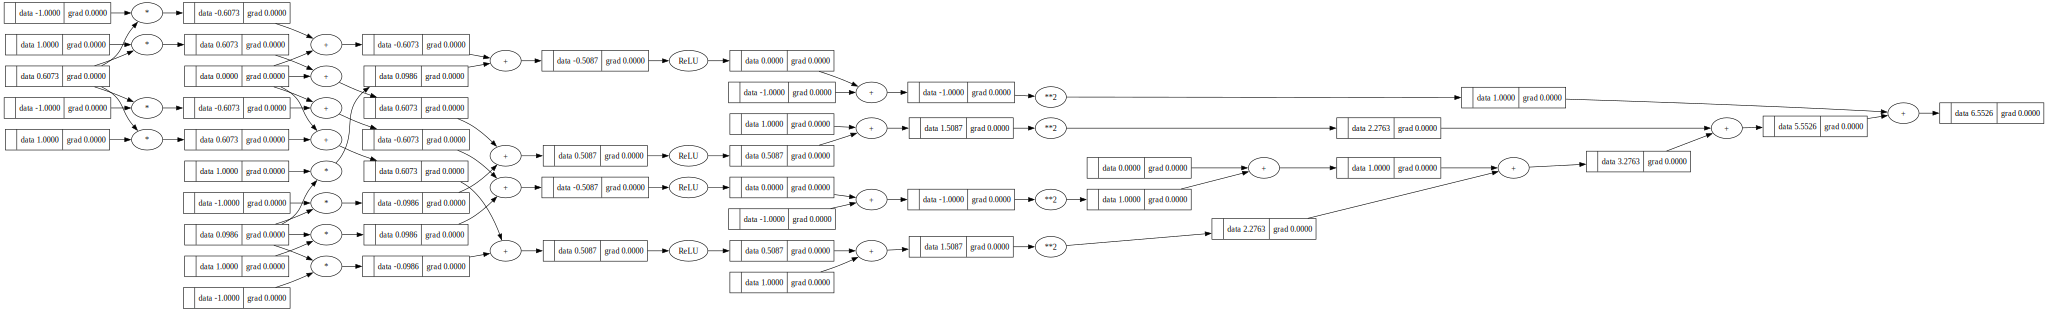

BACKWARD PASS!
Parameters in a neuron: [Value(data=0.6073346290260198, grad=6.034985627552441), Value(data=0.09858822213790952, grad=-6.034985627552441), Value(data=0, grad=6.034985627552441)]


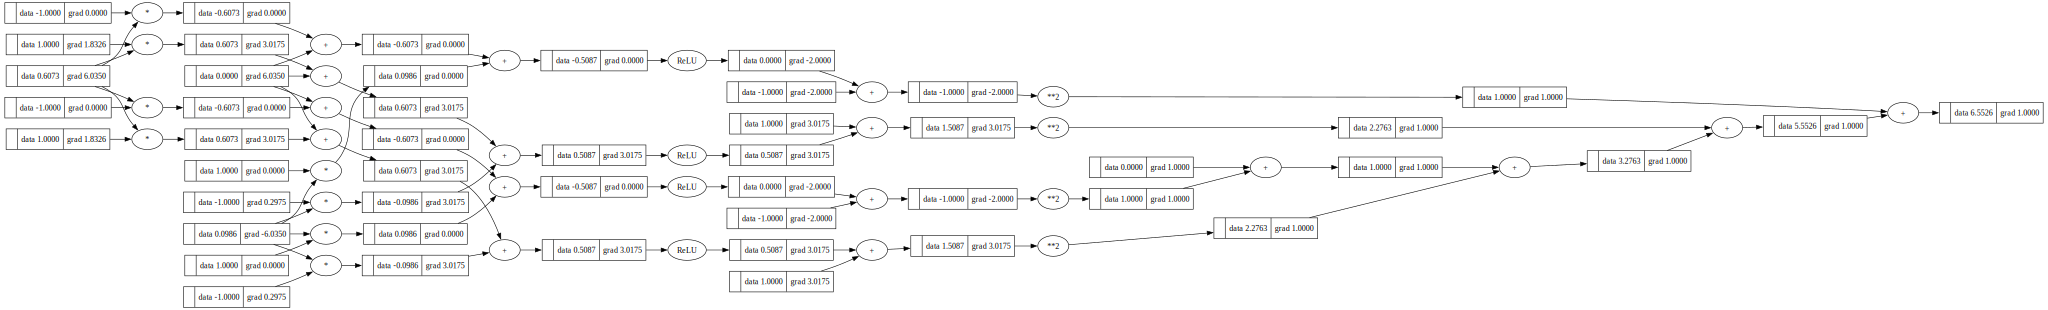

In [5]:
train_one_epoch()

In [6]:
print('Prediction AFTER optimizing for 1 epoch')
ypred

Prediction AFTER optimizing for 1 epoch


[Value(data=0, grad=0),
 Value(data=0.5087464068881102, grad=0),
 Value(data=0.5087464068881102, grad=0),
 Value(data=0, grad=0)]